In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 8271, done.
remote: Counting objects: 100% (583/583), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 8271 (delta 405), reused 456 (delta 306), pack-reused 7688
Receiving objects: 100% (8271/8271), 9.50 MiB | 23.62 MiB/s, done.
Resolving deltas: 100% (5701/5701), done.
     |████████████████████████████████| 10.3MB 8.2MB/s 
     |████████████████████████████████| 15.7MB 197kB/s 
     |████████████████████████████████| 49.9MB 58kB/s 
     |████████████████████████████████| 3.0MB 42.4MB/s 
     |████████████████████████████████| 645kB 39.2MB/s 
     |████████████████████████████████| 28.5MB 107kB/s 
Requirement already up-to-date: torch>=1.7.0 in /usr/local/lib/python3.7/dist-packages (from -r yolov5/requirements.txt (line 10)) (1.9.0+cu102)
Requirement already up-to-date: torchvision>=0.8.1 in /usr/local/lib/python3.7/dist-packages (from -r yolov5/requirements.txt (line 11)) (0.10.0+cu102)
     |███████████████

In [ ]:
!pip install torch==1.7.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.3MB 21kB/s 
     |████████████████████████████████| 5.9MB 54.0MB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.7.0+cu101 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.7.0+cu101 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [ ]:
import torch
from IPython.display import Image  # for displaying images
#from utils.google_utils import gdrive_download  # for downloading models/datasets

print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/My Drive/Yolov5/trafficSign" -d "/content"

Archive:  /content/drive/My Drive/Yolov5/trafficSign.zip
replace /content/test/images/-0GQmYRienNVqEKiQ0Mkyw.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/test/images/-0GQmYRienNVqEKiQ0Mkyw.jpg  
  inflating: /content/test/images/-1dYvHaY52PTrihdjPDPQg.jpg  
  inflating: /content/test/images/-B0k5-dkhan6sBOvgi-o6A.jpg  
  inflating: /content/test/images/-BIXObU5Dbd_RwSUOSQ5WA.jpg  
  inflating: /content/test/images/-BlWD5yiCO2Yi9BLQsRkkg.jpg  
  inflating: /content/test/images/-E0pRusIqLhaIkjlZQGXNg.jpg  
  inflating: /content/test/images/0-thJTKHCgdAsMTzSeAi9w.jpg  
  inflating: /content/test/images/01FUGO6sCXodRNmYJ-9O9Q.jpg  
  inflating: /content/test/images/01ge_HXRvQGXIsTM9G7DQg.jpg  
  inflating: /content/test/images/0CWgzJL6f_umA3b-5FeGJw.jpg  
  inflating: /content/test/images/0cwkRKSJztShNpjhrY0WJw.jpg  
  inflating: /content/test/images/0d2q0HVC4-khsVAqivUngA.jpg  
  inflating: /content/test/images/0D36DRTgbDrKBTPik6rL9A.jpg  
  inflating: /content/test/

In [ ]:
%cd /content/yolov5/data
%cat data.yaml

/content/yolov5/data
train: ../train/images
val: ../valid/images

nc: 13
names: ['SLimit30' , 'SLimit40' , 'SLimit50' , 'RoundAbout' , 'NoEnter' , 'Stop' , 'DriveR' , 'DriveL' , 'CrossWay' , 'GoStraight' , 'Yield' , 'DontStop' , 'Parking' ]

In [ ]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
with open(r'data.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    labels_list = yaml.load(file, Loader=yaml.FullLoader)

    label_names = labels_list['names']

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes  # CHANGED HERE
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cd /content/yolov5
!python train.py --img 1200 --batch 20 --epochs 50 --data './data/data.yaml'  --cfg ./models/custom_yolov5s.yaml --weights '' --project '../drive/My Drive/yolo5Saved

GROUND TRUTH TRAINING DATA:


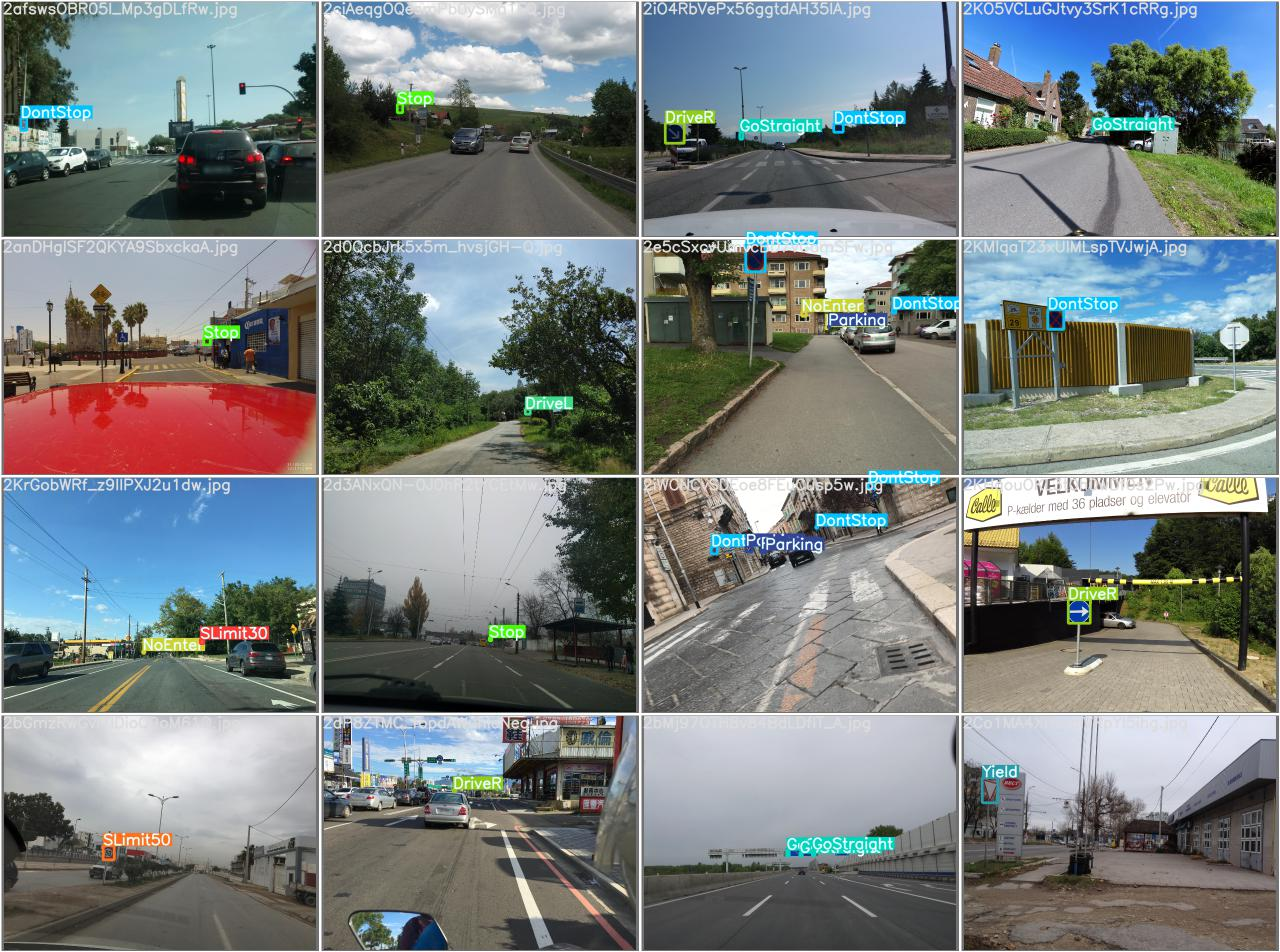

In [ ]:
from IPython.display import Image  
# first, display our ground truth data
# The ground truth [Train data] is available in jpg file at location /content/yolov5/runs/train/exp2/test_batch0_labels.jpg 
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/drive/My Drive/yolo5Saved/exp/val_batch2_labels.jpg', width=1200)

GROUND TRUTH TRAINING DATA:


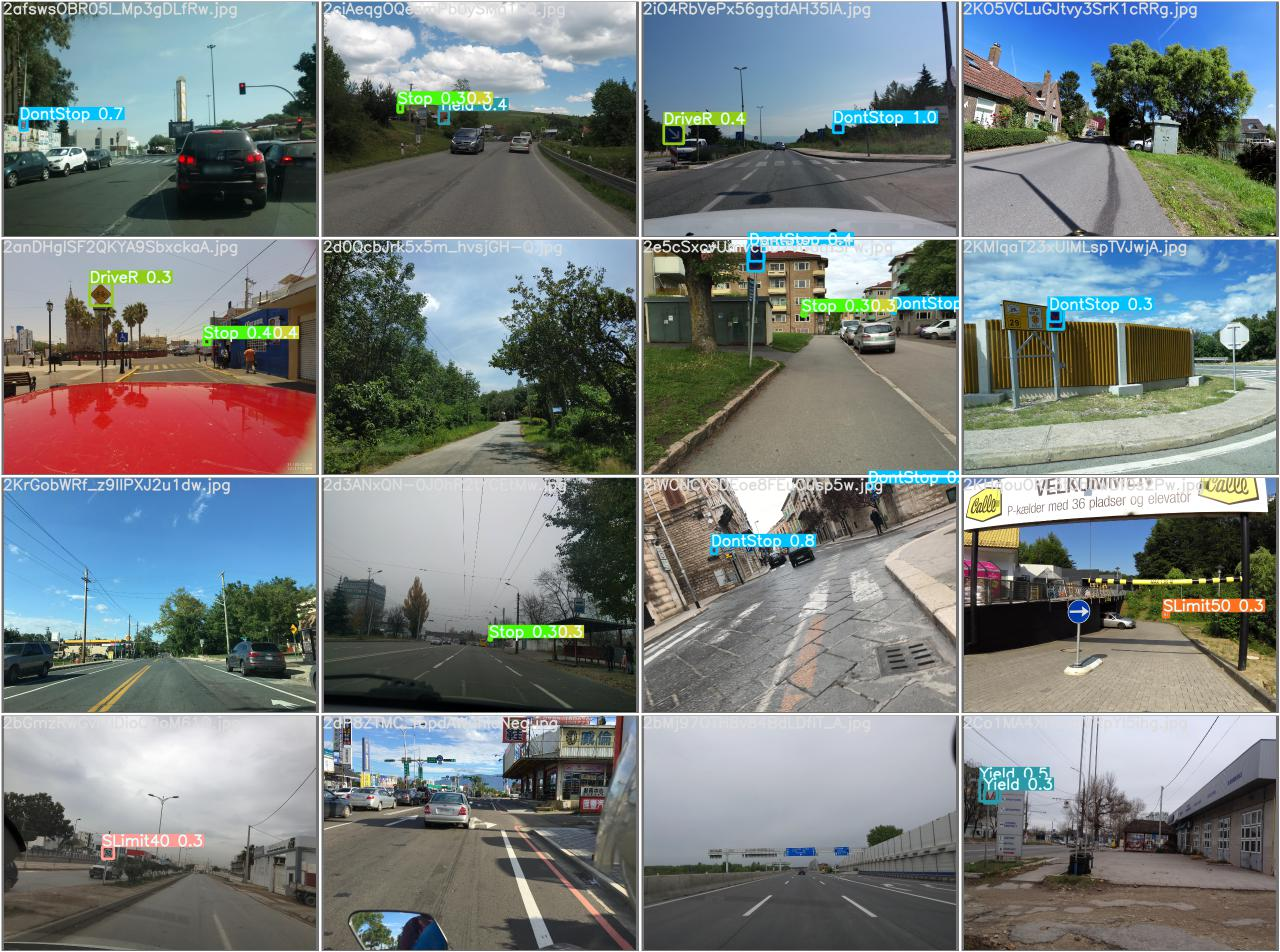

In [ ]:
from IPython.display import Image  
# first, display our ground truth data
# The ground truth [Train data] is available in jpg file at location /content/yolov5/runs/train/exp2/test_batch0_labels.jpg 
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/drive/My Drive/yolo5Saved/exp/val_batch2_pred.jpg', width=1200)

In [ ]:
%cd /content/yolov5/
!python detect.py --weights /content/drive/MyDrive/yolo5Saved/exp/weights/best.pt --img 650 --conf 0.2 --source ../test/images --project /content/drive/MyDrive/yolo5Saved/detect